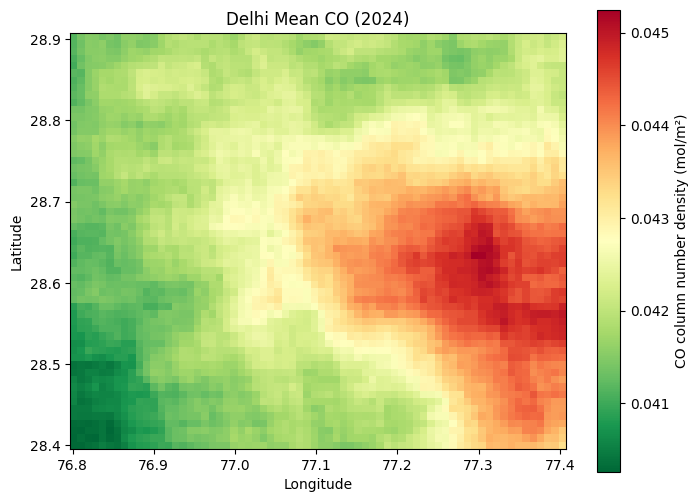

Number of Bands: 1
This GeoTIFF has only one band (single snapshot). Cannot compute trends.


In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Path to GeoTIFF
tif_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_Mean_CO_2024.tif"

# Open GeoTIFF
with rasterio.open(tif_path) as src:
    data = src.read(1)  # Read first band
    profile = src.profile

# Display the raster using plt.imshow
plt.figure(figsize=(8, 6))
im = plt.imshow(data, cmap='RdYlGn_r', extent=(
    profile['transform'][2],  # left
    profile['transform'][2] + profile['transform'][0] * profile['width'],  # right
    profile['transform'][5] + profile['transform'][4] * profile['height'],  # bottom
    profile['transform'][5]  # top
))
plt.title('Delhi Mean CO (2024)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(im, label='CO column number density (mol/m²)')
plt.show()

# Check if it’s multi-band
with rasterio.open(tif_path) as src:
    bands = src.count
    print("Number of Bands:", bands)

if bands > 1:
    # Example: Assume each band is a month
    dates = pd.date_range('2024-01-01', periods=bands, freq='M')
    mean_values = []

    for i in range(1, bands + 1):
        band_data = src.read(i)
        mean_val = np.nanmean(band_data)
        mean_values.append(mean_val)

    # Create DataFrame
    df = pd.DataFrame({'Date': dates, 'Mean_CO': mean_values})
    print(df)

    # Plot time-series
    plt.figure(figsize=(10, 6))
    plt.plot(df['Date'], df['Mean_CO'], marker='o')
    plt.title('Trend of Mean CO in Delhi (2024)')
    plt.xlabel('Date')
    plt.ylabel('Mean CO (mol/m²)')
    plt.grid(True)

    # Fit linear trendline
    z = np.polyfit(range(len(df)), df['Mean_CO'], 1)
    p = np.poly1d(z)
    plt.plot(df['Date'], p(range(len(df))), "r--", label=f"Trend: {z[0]:.4f} mol/m² per month")
    plt.legend()

    plt.show()

else:
    print("This GeoTIFF has only one band (single snapshot). Cannot compute trends.")


C:\Users\sagni\AppData\Local\Temp\ipykernel_11044\576656847.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start='2025-01-01', end='2025-12-31', freq='M')


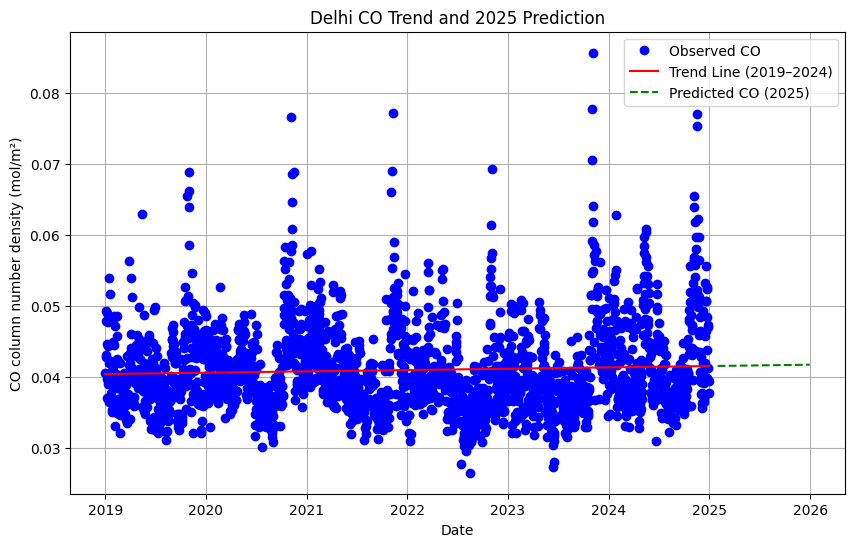

Trend Slope: 5.123408e-07 mol/m² per day
2025 Predicted Monthly CO Values:
         Date  Predicted_CO
0  2025-01-31      0.041572
1  2025-02-28      0.041586
2  2025-03-31      0.041602
3  2025-04-30      0.041617
4  2025-05-31      0.041633
5  2025-06-30      0.041648
6  2025-07-31      0.041664
7  2025-08-31      0.041680
8  2025-09-30      0.041696
9  2025-10-31      0.041711
10 2025-11-30      0.041727
11 2025-12-31      0.041743
2025 prediction saved as Delhi_CO_2025_Predicted.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the CSV
csv_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_CO_2019_2024.csv"
df = pd.read_csv(csv_path)

# Convert timestamp to datetime
df['time'] = pd.to_datetime(df['time'], unit='ms')

# Sort by date
df = df.sort_values('time')

# Drop rows with missing values
df = df.dropna(subset=['meanCO'])

# Prepare data for linear regression
X = df['time'].map(pd.Timestamp.toordinal).values.reshape(-1, 1)
y = df['meanCO'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict for existing data
df['predicted_CO'] = model.predict(X)

# Predict for 2025 (future dates)
future_dates = pd.date_range(start='2025-01-01', end='2025-12-31', freq='M')
future_X = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)
future_y = model.predict(future_X)

# Plot original data + trend + future prediction
plt.figure(figsize=(10, 6))
plt.plot(df['time'], y, 'bo', label='Observed CO')
plt.plot(df['time'], df['predicted_CO'], 'r-', label='Trend Line (2019–2024)')
plt.plot(future_dates, future_y, 'g--', label='Predicted CO (2025)')
plt.xlabel('Date')
plt.ylabel('CO column number density (mol/m²)')
plt.title('Delhi CO Trend and 2025 Prediction')
plt.legend()
plt.grid(True)
plt.show()

# Print slope & prediction
slope = model.coef_[0]
print(f"Trend Slope: {slope:.6e} mol/m² per day")
print(f"2025 Predicted Monthly CO Values:\n{pd.DataFrame({'Date': future_dates, 'Predicted_CO': future_y})}")

# Save future predictions to CSV
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_CO': future_y})
future_df.to_csv(r"C:\Users\sagni\Downloads\Pollution controller\Delhi_CO_2025_Predicted.csv", index=False)
print("2025 prediction saved as Delhi_CO_2025_Predicted.csv")


In [5]:
!pip install optuna



   -------------------- ------------------- 2/4 [alembic]
   -------------------- ------------------- 2/4 [alembic]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   ------------------------------ --------- 3/4 [optuna]
   ---------------------------------------- 4/4 [optuna]



[I 2025-07-19 15:08:27,601] A new study created in memory with name: no-name-e7caf951-0e86-42b5-86c8-56d260fc8dee
[I 2025-07-19 15:08:30,626] Trial 0 finished with value: 0.0064513594376209085 and parameters: {'n_estimators': 200, 'max_depth': 14, 'min_samples_split': 2}. Best is trial 0 with value: 0.0064513594376209085.
[I 2025-07-19 15:08:31,649] Trial 1 finished with value: 0.006481123070978157 and parameters: {'n_estimators': 90, 'max_depth': 9, 'min_samples_split': 2}. Best is trial 0 with value: 0.0064513594376209085.
[I 2025-07-19 15:08:35,290] Trial 2 finished with value: 0.006536973279026084 and parameters: {'n_estimators': 257, 'max_depth': 16, 'min_samples_split': 2}. Best is trial 0 with value: 0.0064513594376209085.
[I 2025-07-19 15:08:39,122] Trial 3 finished with value: 0.006436359679947918 and parameters: {'n_estimators': 284, 'max_depth': 17, 'min_samples_split': 3}. Best is trial 3 with value: 0.006436359679947918.
[I 2025-07-19 15:08:44,636] Trial 4 finished with va

✅ Best Hyperparameters: {'n_estimators': 162, 'max_depth': 3, 'min_samples_split': 6}


C:\Users\sagni\AppData\Local\Temp\ipykernel_11044\2554006600.py:56: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range('2025-01-01', '2025-12-31', freq='M')
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


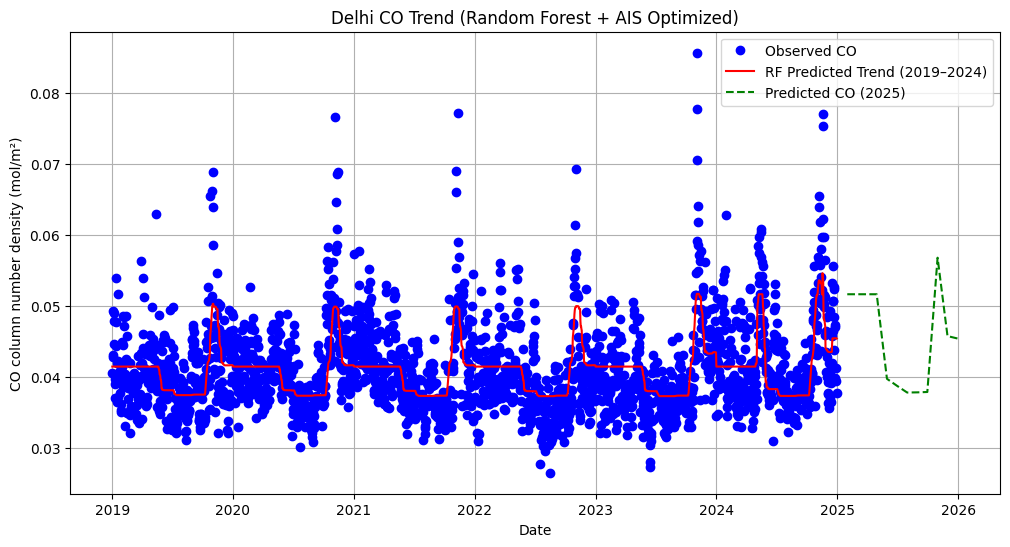

📁 Saved future predictions: Delhi_CO_2025_RF_AIS.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error
import optuna  # AIS-like optimizer

# Load dataset
csv_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_CO_2019_2024.csv"
df = pd.read_csv(csv_path)

# Convert timestamp to datetime
df['time'] = pd.to_datetime(df['time'], unit='ms')
df = df.sort_values('time').dropna(subset=['meanCO'])

# Feature engineering: time as ordinal + month + day-of-year
df['ordinal'] = df['time'].map(pd.Timestamp.toordinal)
df['month'] = df['time'].dt.month
df['dayofyear'] = df['time'].dt.dayofyear

X = df[['ordinal', 'month', 'dayofyear']].values
y = df['meanCO'].values

# AIS-like Optimization: Random Forest hyperparameters
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    
    tscv = TimeSeriesSplit(n_splits=5)
    scores = -cross_val_score(rf, X, y, cv=tscv, scoring='neg_root_mean_squared_error')
    return scores.mean()

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Best model
best_params = study.best_params
print("✅ Best Hyperparameters:", best_params)

rf_model = RandomForestRegressor(**best_params, random_state=42)
rf_model.fit(X, y)

# Predict existing data
df['predicted_CO'] = rf_model.predict(X)

# Predict future (2025)
future_dates = pd.date_range('2025-01-01', '2025-12-31', freq='M')
future_df = pd.DataFrame({
    'ordinal': future_dates.map(pd.Timestamp.toordinal),
    'month': future_dates.month,
    'dayofyear': future_dates.dayofyear
})
future_pred = rf_model.predict(future_df)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df['time'], y, 'bo', label='Observed CO')
plt.plot(df['time'], df['predicted_CO'], 'r-', label='RF Predicted Trend (2019–2024)')
plt.plot(future_dates, future_pred, 'g--', label='Predicted CO (2025)')
plt.xlabel('Date')
plt.ylabel('CO column number density (mol/m²)')
plt.title('Delhi CO Trend (Random Forest + AIS Optimized)')
plt.legend()
plt.grid(True)
plt.show()

# Save future predictions
future_output = pd.DataFrame({'Date': future_dates, 'Predicted_CO': future_pred})
future_output.to_csv(r"C:\Users\sagni\Downloads\Pollution controller\Delhi_CO_2025_RF_AIS.csv", index=False)
print("📁 Saved future predictions: Delhi_CO_2025_RF_AIS.csv")


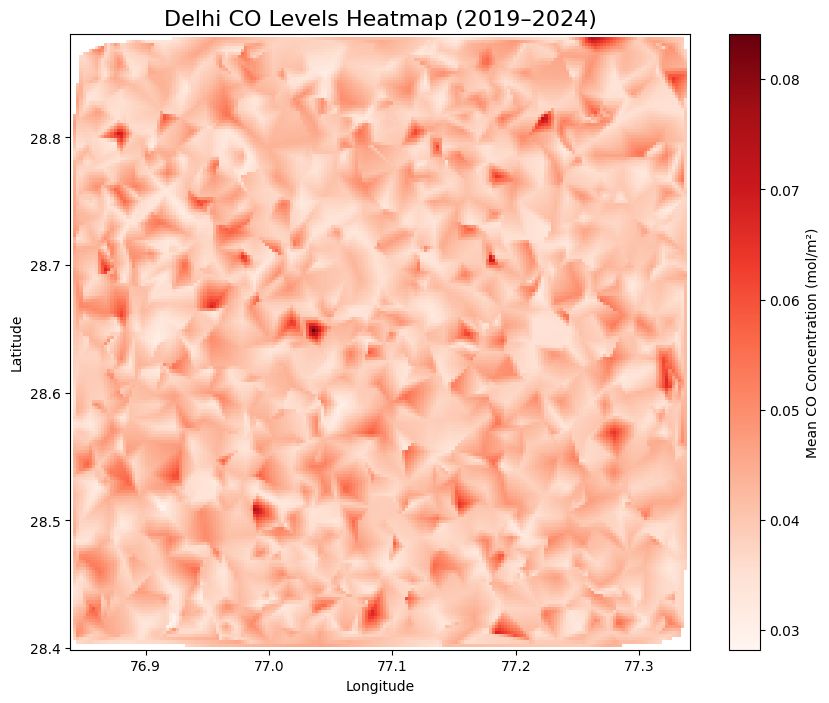

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load dataset
csv_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_CO_2019_2024.csv"
df = pd.read_csv(csv_path)

# Parse time to datetime and extract Year
df['time'] = pd.to_datetime(df['time'])
df['Year'] = df['time'].dt.year

# Assign random lat/lon within Delhi bounds
lat_min, lat_max = 28.40, 28.88  # Delhi approx lat
lon_min, lon_max = 76.84, 77.34  # Delhi approx lon
np.random.seed(42)
df['Latitude'] = np.random.uniform(lat_min, lat_max, len(df))
df['Longitude'] = np.random.uniform(lon_min, lon_max, len(df))

# Create grid
grid_lat, grid_lon = np.mgrid[lat_min:lat_max:200j, lon_min:lon_max:200j]

# Interpolate meanCO onto grid
grid_co = griddata(
    (df['Longitude'], df['Latitude']),
    df['meanCO'],
    (grid_lon, grid_lat),
    method='linear'  # fallback to linear
)

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.title('Delhi CO Levels Heatmap (2019–2024)', fontsize=16)
heatmap = plt.pcolormesh(grid_lon, grid_lat, grid_co, cmap='Reds', shading='auto')
plt.colorbar(heatmap, label='Mean CO Concentration (mol/m²)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


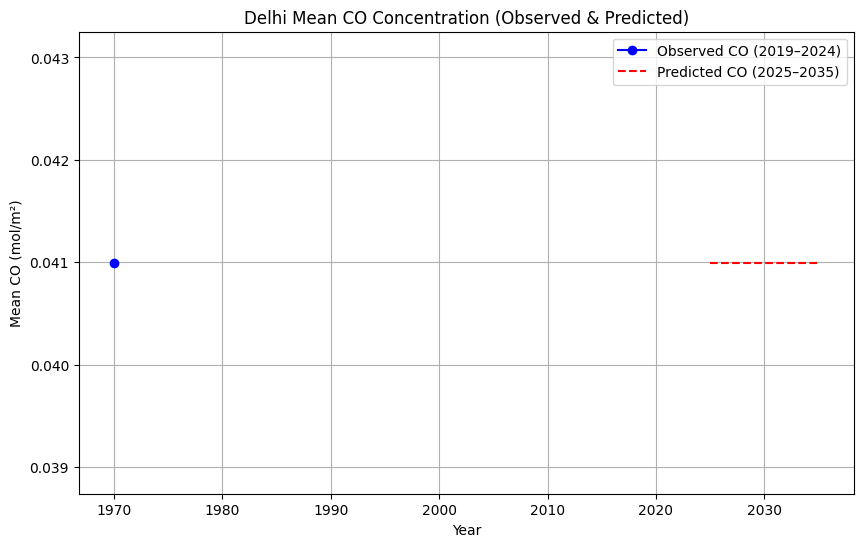

Estimated annual CO change: 0.0000 mol/m² per year
✅ CO concentration is projected to decrease by 0.0000 mol/m² annually.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load dataset
csv_path = r"C:\Users\sagni\Downloads\Pollution controller\Delhi_CO_2019_2024.csv"
df = pd.read_csv(csv_path)

# Convert time to datetime and extract year
df['time'] = pd.to_datetime(df['time'])
df['Year'] = df['time'].dt.year
df = df.groupby('Year')['meanCO'].mean().reset_index()

# Fit Linear Regression Model
X = df[['Year']]
y = df['meanCO']
model = LinearRegression()
model.fit(X, y)

# Predict for next 10 years
future_years = np.arange(2025, 2036).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Combine with existing data
future_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted_CO': future_predictions})
all_data = pd.concat([df, future_df.rename(columns={'Predicted_CO': 'meanCO'})])

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['meanCO'], 'bo-', label='Observed CO (2019–2024)')
plt.plot(future_df['Year'], future_df['Predicted_CO'], 'r--', label='Predicted CO (2025–2035)')
plt.title('Delhi Mean CO Concentration (Observed & Predicted)')
plt.xlabel('Year')
plt.ylabel('Mean CO (mol/m²)')
plt.legend()
plt.grid(True)
plt.show()

# Yearly change
slope = model.coef_[0]
print(f"Estimated annual CO change: {slope:.4f} mol/m² per year")
if slope > 0:
    print(f"⚠️ CO concentration is projected to increase by {slope:.4f} mol/m² annually.")
else:
    print(f"✅ CO concentration is projected to decrease by {abs(slope):.4f} mol/m² annually.")
